In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
space_data = {
    # "name" : (x, y, area)
    "P1": (-56, -1298, 5.4),
    "P2": (-602, -1030, 7.52),
    "P3": (-394, -1042, 8),
    "P4": (-195, -1046, 8),
    "P5": (1, -1046, 7.56),
    "P6": (-814, -932, 4.19),
    "P7": (-824, -643, 6.28),
    "P8": (-600, -600, 7.6),
    "P9": (-399, -639, 8),
    "P10": (-195, -632, 8),
    "P11": (0, -600, 7.67),
    "P12": (56, -334, 5.4),
    "P13": (-195, -258, 5.98),
    "P14": (-417, -269, 7.34),
    "P15": (-794, -258, 7.97),
    "P16": (408, -158, 5.64),
    "P17": (189, -43, 6.11),
    "P18": (0, 0, 7.11), # <--------------------------------------- HQ
    "P19": (600, 0, 4.92),
    "P20": (-931, 75, 1.38),
    "P21": (-808, 75, 8),
    "P22": (-604, 79, 7.82),
    "P23": (-403, 136, 5.53),
    "P24": (-206, 133, 5.64),
    "P25": (800, 200, 5.05),
    "P26": (1000, 400, 4.75),
    "P27": (-927, 445, 1.28),
    "P28": (-801, 434, 6.64),
    "P29": (-597, 431, 6.54),
    "P30": (-349, 380, 6.76),
    "P31": (153, -492, 1.47),
}

In [4]:
spaces = pd.DataFrame(space_data).T
spaces.columns = ["x", "y", "area"]
spaces.reset_index(inplace=True)
spaces.head()

,index,x,y,area
0,P1,-56.0,-1298.0,5.40
1,P2,-602.0,-1030.0,7.52
2,P3,-394.0,-1042.0,8.00
3,P4,-195.0,-1046.0,8.00
4,P5,1.0,-1046.0,7.56


# Generacion de configuraciones

In [118]:
import random
sizes = [15, 20, 25, 31]
shifts = [1,2,3] # m

for size in sizes:
    selected_nodes = list(spaces.index)
    random_nodes = random.sample(list(spaces.drop(17).index), size-1)
    # Add node 18 to the selected nodes
    selected_nodes = random_nodes + [17]

    temp_df = spaces.loc[selected_nodes].sort_index()
    print(temp_df.index)
    
    file_name = "config/mtsp" + "_" + str(size) + ".txt"
    print(random.sample(range(1,size+1), 5))
    print()
    with open(file_name, 'w') as file:
        txt = ""

        for j in range(len(temp_df)):
            line = f"{j+1}"
            for k in range(len(temp_df)):
                if (j != k):
                    distance = np.linalg.norm(temp_df.iloc[j, [1,2]] - temp_df.iloc[k, [1,2]] + 0.000001) / 1000
                else:
                    distance = 9999
                
                line += "\t" + str(distance)[:4]
            # print(line)
            txt += line + "\n"
        
        file.write(txt)
        file.close()

Index([0, 3, 5, 8, 9, 10, 13, 15, 17, 22, 23, 24, 25, 27, 30], dtype='int64')
[4, 1, 10, 14, 6]

Index([2, 3, 5, 6, 8, 9, 10, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27,
       28],
      dtype='int64')
[14, 16, 15, 5, 18]

Index([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 18, 19, 21,
       22, 24, 25, 27, 28, 29, 30],
      dtype='int64')
[16, 9, 3, 8, 1]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int64')
[29, 22, 23, 15, 8]



In [125]:
for size in sizes:
    for shift in shifts:
        for i in range(5):
            file_name = "soluciones/sol" + "_" + str(size) + "_" + str(i+1) + "_" + str(shift) + ".txt"
            with open(file_name, 'w') as file:
                txt = ""
                file.write(txt)
                file.close()

In [8]:
def view(ruta, spaces, name):
    fig = plt.figure(figsize=(8,8))
    fig.suptitle(name, fontsize=16)  # Title for the entire figure

    nodes = list(spaces['index'])
    pos = spaces.set_index('index')[['x','y']].T.to_dict('list')

    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(ruta)
    nx.draw_networkx(G, pos=pos)

    plt.tight_layout()
    plt.show()
    plt.savefig(name + ".png")

[('P1', 'P2'), ('P2', 'P5'), ('P3', 'P1'), ('P4', 'P3'), ('P5', 'P6'), ('P6', 'P15'), ('P7', 'P4'), ('P8', 'P13'), ('P9', 'P11'), ('P10', 'P14'), ('P11', 'P10'), ('P12', 'P9'), ('P13', 'P12'), ('P14', 'P7'), ('P15', 'P8')]


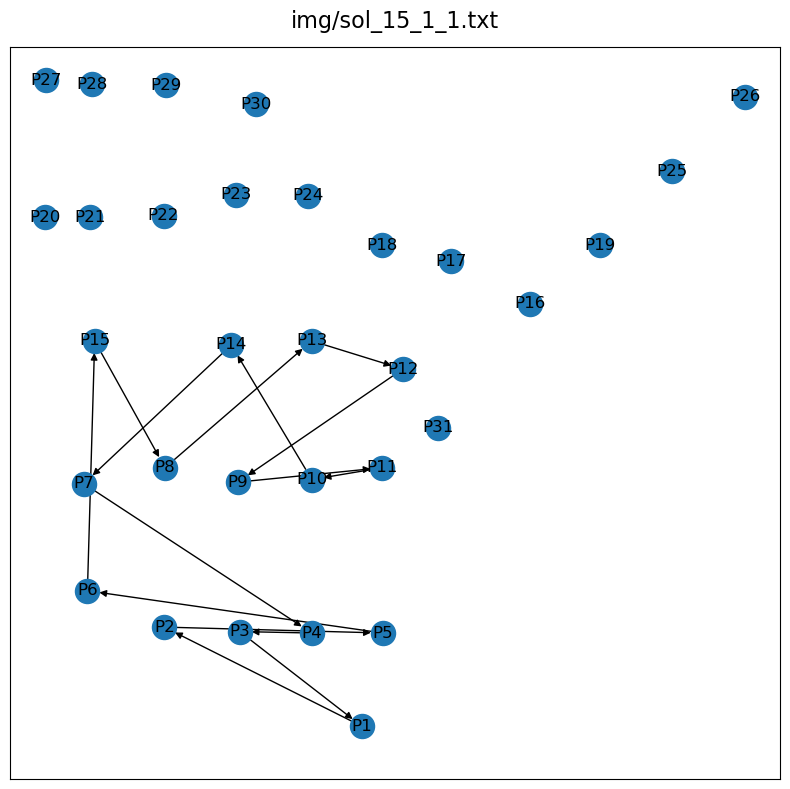

[('P1', 'P2'), ('P2', 'P4'), ('P3', 'P1'), ('P4', 'P3'), ('P4', 'P7'), ('P5', 'P4'), ('P6', 'P5'), ('P7', 'P14'), ('P8', 'P15'), ('P9', 'P13'), ('P10', 'P11'), ('P11', 'P9'), ('P12', 'P8'), ('P13', 'P12'), ('P14', 'P10'), ('P15', 'P6')]


<Figure size 640x480 with 0 Axes>

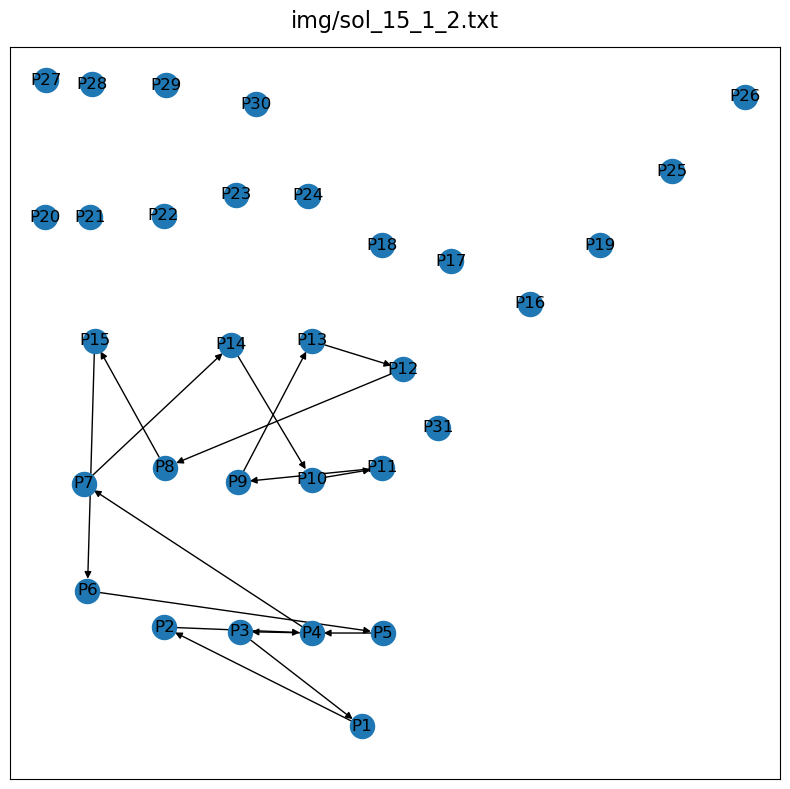

[('P1', 'P2'), ('P2', 'P4'), ('P3', 'P4'), ('P4', 'P3'), ('P4', 'P5'), ('P4', 'P7'), ('P5', 'P4'), ('P6', 'P1'), ('P7', 'P14'), ('P8', 'P15'), ('P9', 'P13'), ('P10', 'P11'), ('P11', 'P9'), ('P12', 'P8'), ('P13', 'P12'), ('P14', 'P10'), ('P15', 'P6')]


<Figure size 640x480 with 0 Axes>

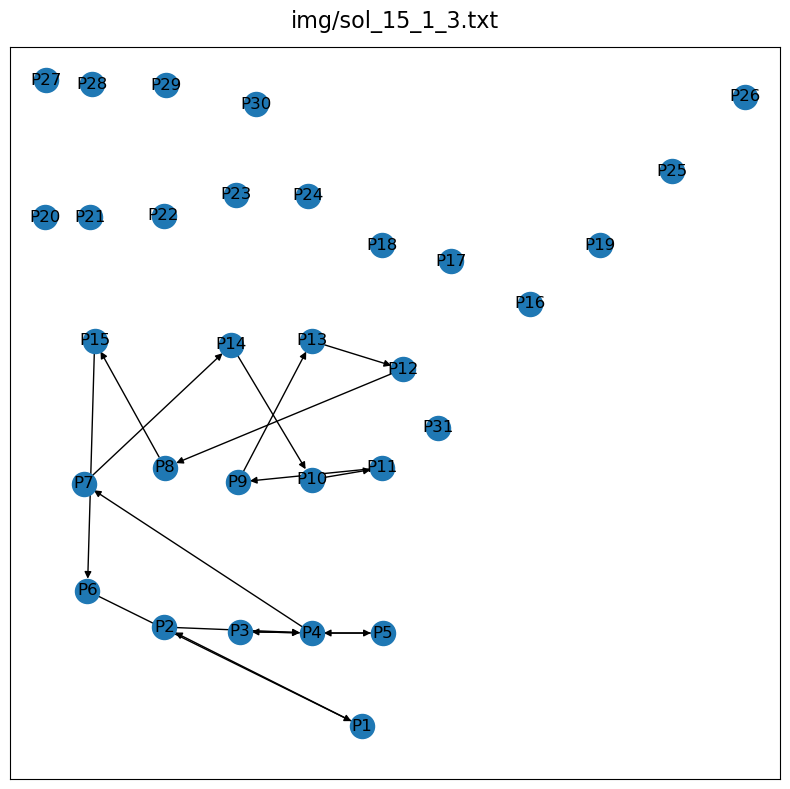

[('P1', 'P2'), ('P2', 'P7'), ('P3', 'P1'), ('P4', 'P3'), ('P5', 'P4'), ('P6', 'P5'), ('P7', 'P14'), ('P8', 'P15'), ('P9', 'P13'), ('P10', 'P11'), ('P11', 'P9'), ('P12', 'P8'), ('P13', 'P12'), ('P14', 'P10'), ('P15', 'P6')]


<Figure size 640x480 with 0 Axes>

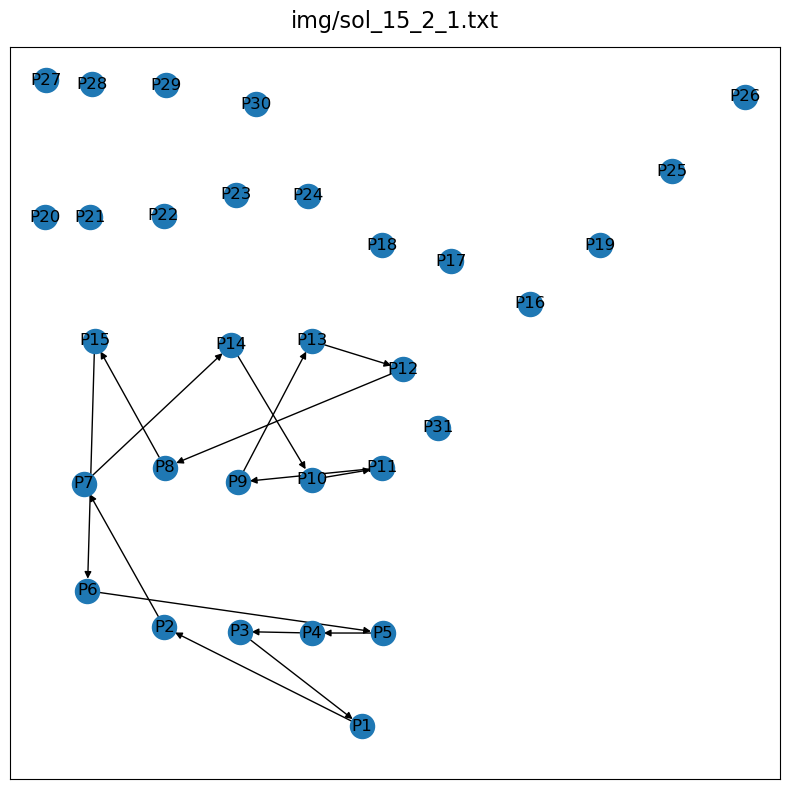

[('P1', 'P2'), ('P1', 'P6'), ('P2', 'P1'), ('P3', 'P1'), ('P4', 'P5'), ('P5', 'P3'), ('P6', 'P15'), ('P7', 'P4'), ('P8', 'P12'), ('P9', 'P11'), ('P10', 'P14'), ('P11', 'P10'), ('P12', 'P13'), ('P13', 'P9'), ('P14', 'P7'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

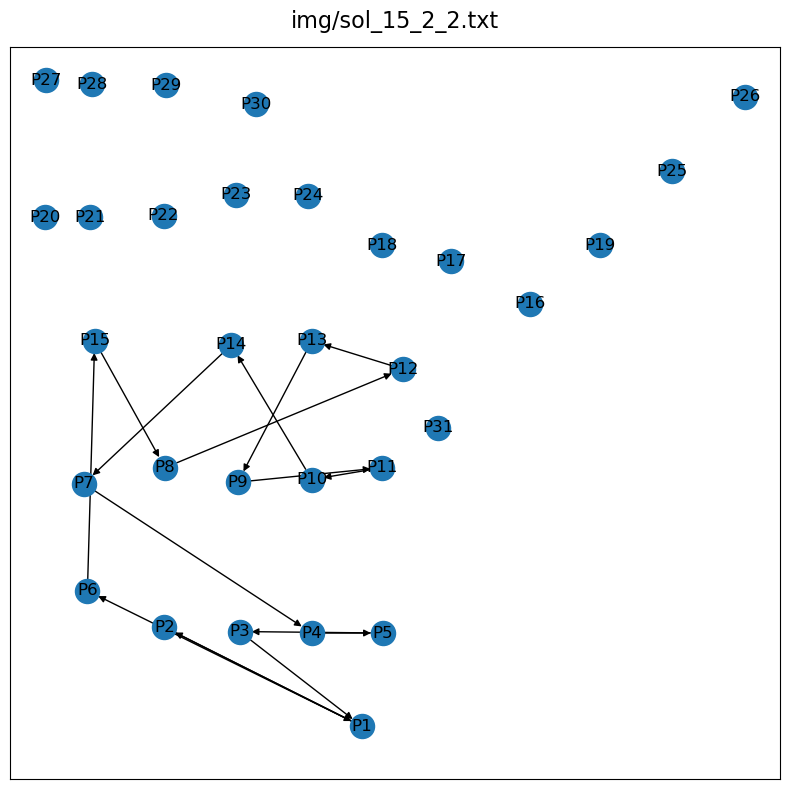

[('P1', 'P2'), ('P1', 'P3'), ('P1', 'P5'), ('P2', 'P1'), ('P3', 'P1'), ('P4', 'P7'), ('P5', 'P4'), ('P6', 'P1'), ('P7', 'P14'), ('P8', 'P15'), ('P9', 'P13'), ('P10', 'P11'), ('P11', 'P9'), ('P12', 'P8'), ('P13', 'P12'), ('P14', 'P10'), ('P15', 'P6')]


<Figure size 640x480 with 0 Axes>

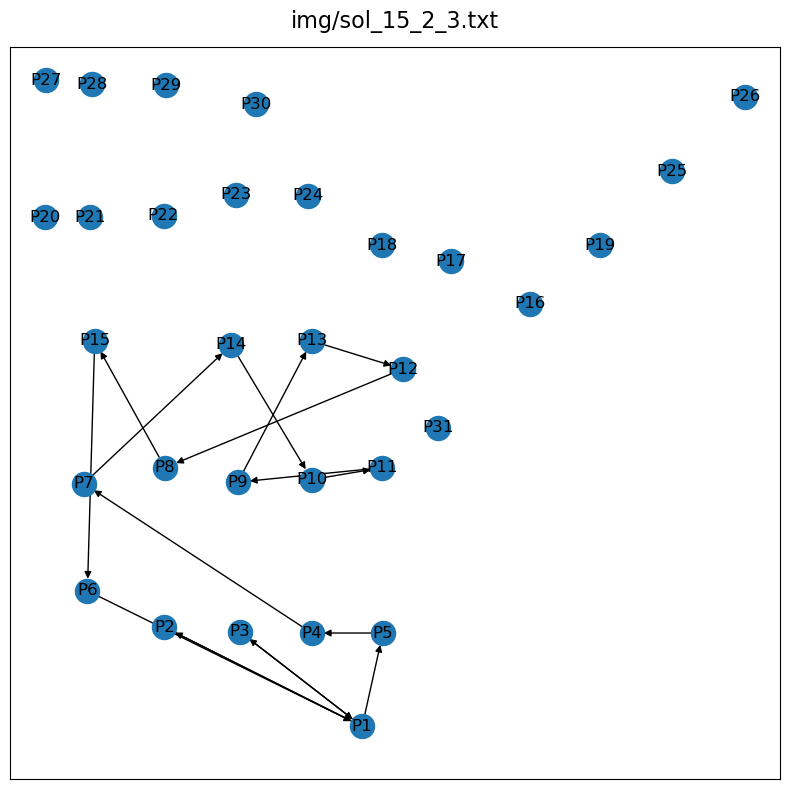

[('P1', 'P2'), ('P2', 'P5'), ('P3', 'P1'), ('P4', 'P3'), ('P5', 'P6'), ('P6', 'P15'), ('P7', 'P4'), ('P8', 'P12'), ('P9', 'P11'), ('P10', 'P14'), ('P11', 'P10'), ('P12', 'P13'), ('P13', 'P9'), ('P14', 'P7'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

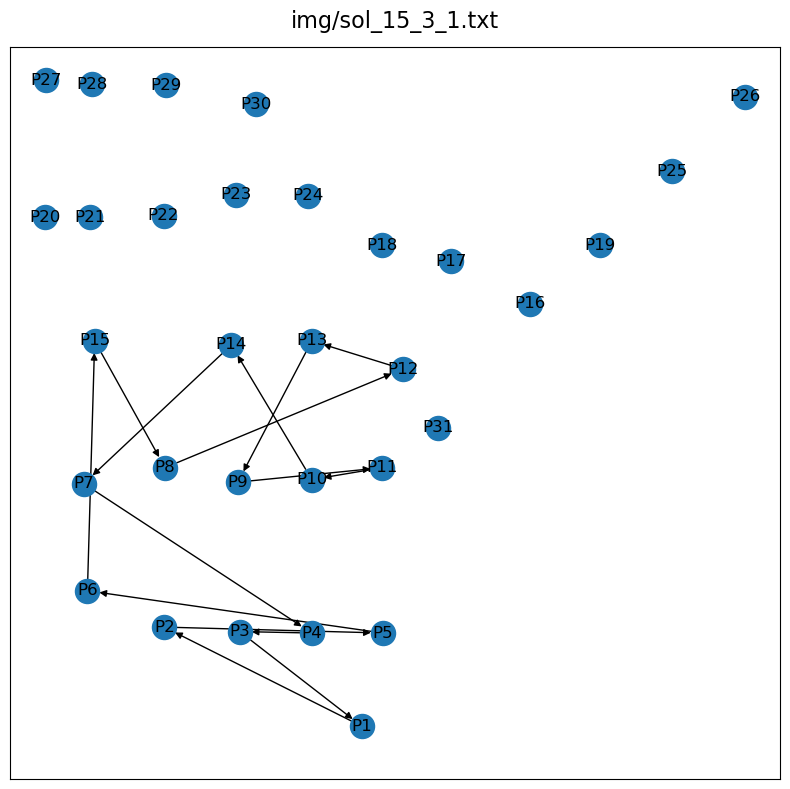

[('P1', 'P2'), ('P2', 'P3'), ('P3', 'P4'), ('P4', 'P6'), ('P5', 'P1'), ('P6', 'P15'), ('P7', 'P5'), ('P8', 'P13'), ('P9', 'P11'), ('P10', 'P7'), ('P10', 'P14'), ('P11', 'P10'), ('P12', 'P9'), ('P13', 'P12'), ('P14', 'P10'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

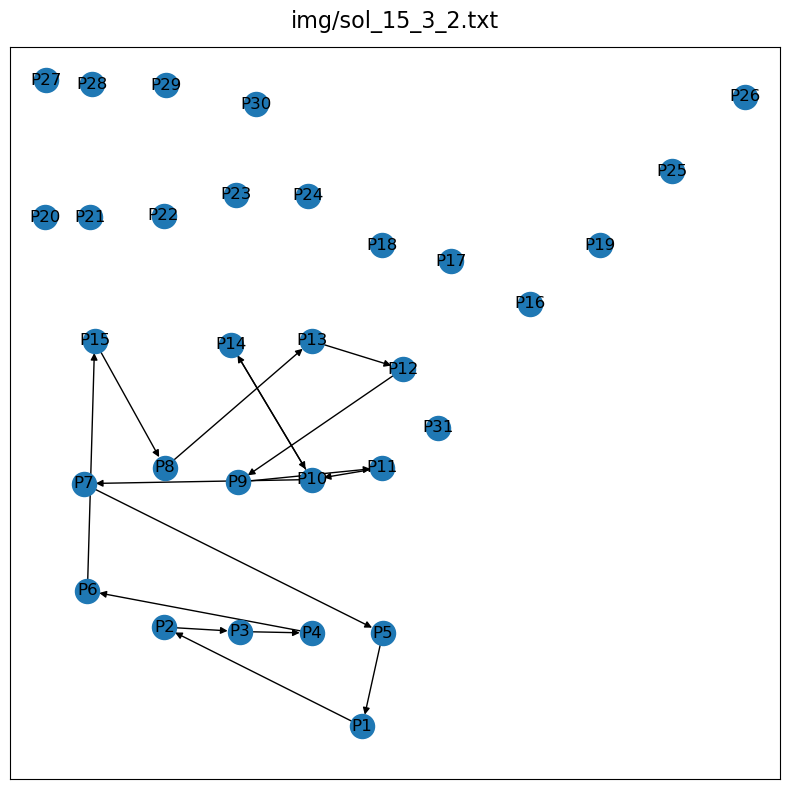

[('P1', 'P6'), ('P2', 'P1'), ('P3', 'P2'), ('P4', 'P3'), ('P5', 'P4'), ('P6', 'P15'), ('P7', 'P5'), ('P8', 'P12'), ('P9', 'P10'), ('P10', 'P7'), ('P10', 'P11'), ('P10', 'P14'), ('P11', 'P9'), ('P12', 'P13'), ('P13', 'P10'), ('P14', 'P10'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

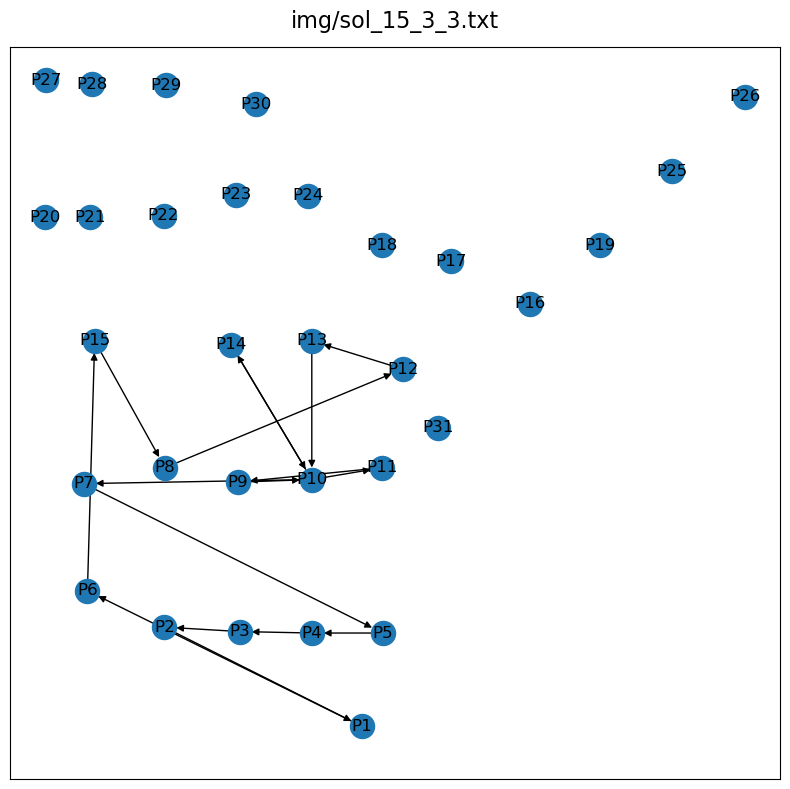

[('P1', 'P6'), ('P2', 'P1'), ('P3', 'P2'), ('P4', 'P3'), ('P5', 'P4'), ('P6', 'P15'), ('P7', 'P5'), ('P8', 'P12'), ('P9', 'P10'), ('P10', 'P7'), ('P10', 'P11'), ('P10', 'P14'), ('P11', 'P9'), ('P12', 'P13'), ('P13', 'P10'), ('P14', 'P10'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

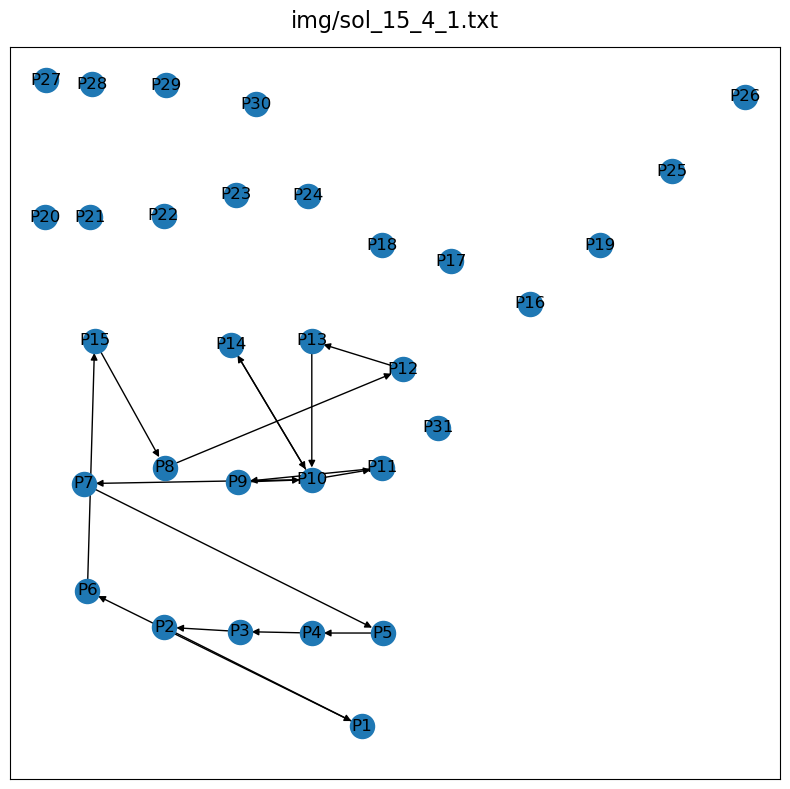

[('P1', 'P2'), ('P2', 'P5'), ('P3', 'P1'), ('P4', 'P3'), ('P5', 'P6'), ('P6', 'P15'), ('P7', 'P4'), ('P8', 'P12'), ('P9', 'P11'), ('P10', 'P14'), ('P11', 'P14'), ('P12', 'P13'), ('P13', 'P9'), ('P14', 'P7'), ('P14', 'P10'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

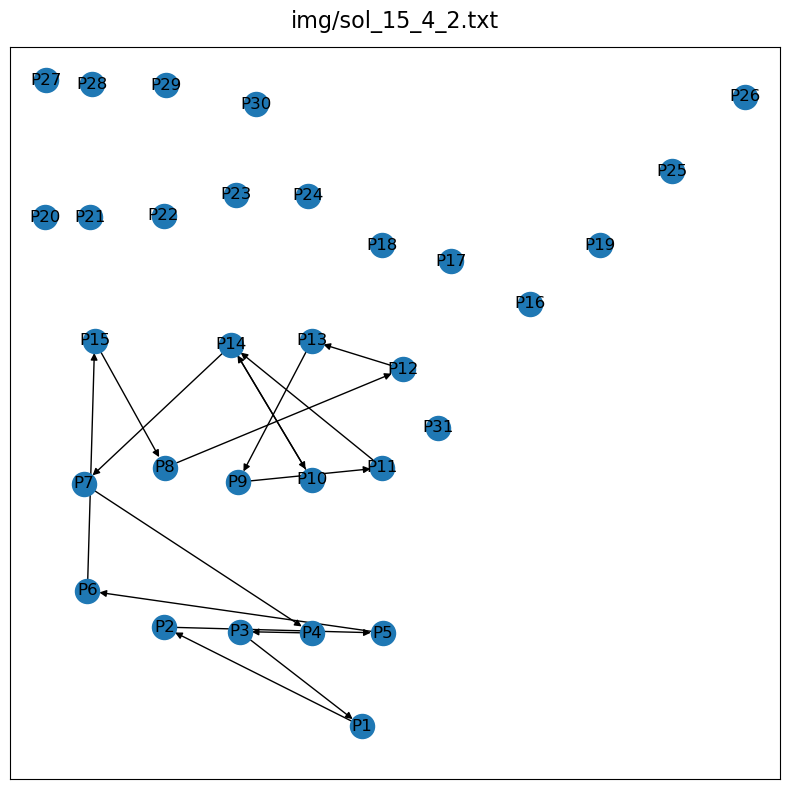

[('P1', 'P2'), ('P2', 'P7'), ('P3', 'P1'), ('P4', 'P3'), ('P5', 'P4'), ('P6', 'P5'), ('P7', 'P14'), ('P8', 'P13'), ('P9', 'P8'), ('P10', 'P14'), ('P11', 'P14'), ('P12', 'P15'), ('P13', 'P12'), ('P14', 'P9'), ('P14', 'P10'), ('P14', 'P11'), ('P15', 'P6')]


<Figure size 640x480 with 0 Axes>

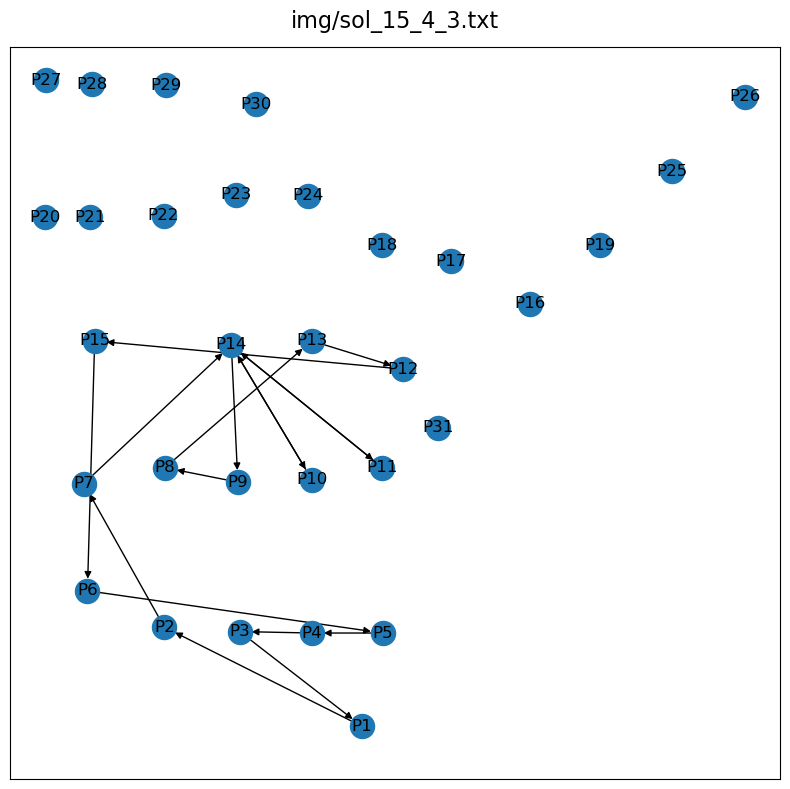

[('P1', 'P2'), ('P2', 'P5'), ('P3', 'P1'), ('P4', 'P3'), ('P5', 'P6'), ('P6', 'P15'), ('P7', 'P4'), ('P8', 'P13'), ('P9', 'P11'), ('P10', 'P14'), ('P11', 'P10'), ('P12', 'P9'), ('P13', 'P12'), ('P14', 'P7'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

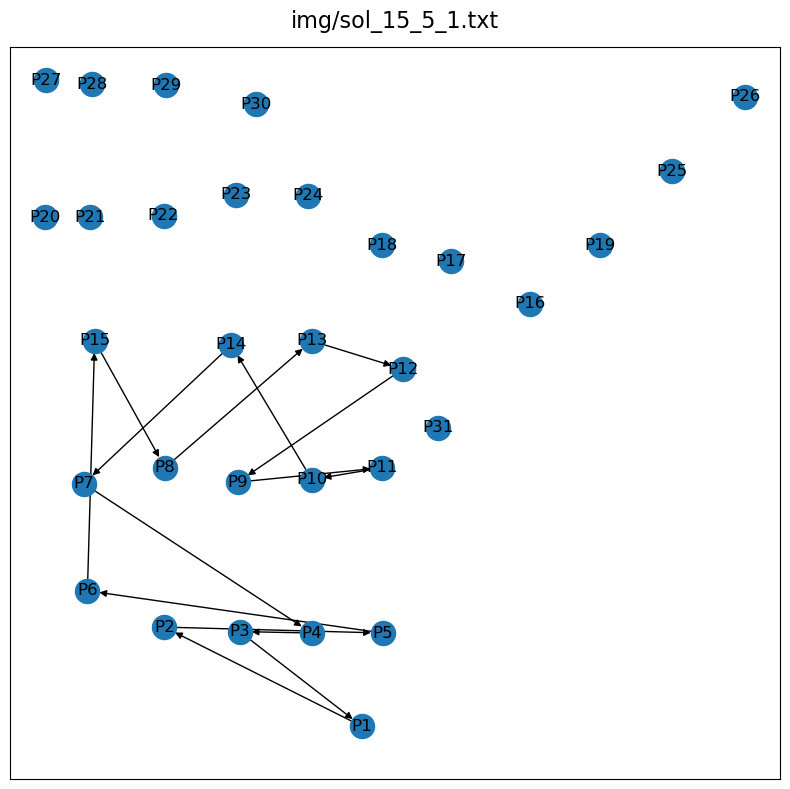

[('P1', 'P2'), ('P2', 'P6'), ('P3', 'P1'), ('P4', 'P3'), ('P5', 'P6'), ('P6', 'P5'), ('P6', 'P15'), ('P7', 'P4'), ('P8', 'P13'), ('P9', 'P11'), ('P10', 'P14'), ('P11', 'P10'), ('P12', 'P9'), ('P13', 'P12'), ('P14', 'P7'), ('P15', 'P8')]


<Figure size 640x480 with 0 Axes>

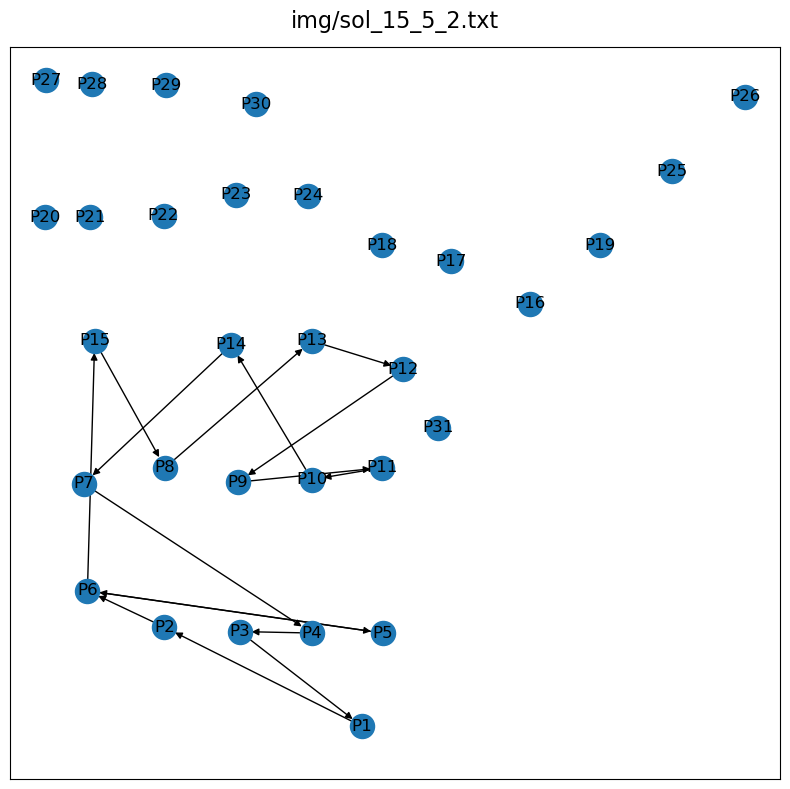

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

In [10]:
import os

# Get the list of files in the "soluciones/" directory
file_list = os.listdir('soluciones/')

# Iterate over each file
for file_name in file_list:
    # Construct the file path
    file_path = os.path.join('soluciones/', file_name)
    
    # Check if the file is a text file
    if file_name.endswith('.txt'):
        # Open the file
        with open(file_path, 'r') as file:
            ruta = []
            contents = file.read()
            for line in contents.split('\n'):
                for char in line:
                    if char == ' ':
                        line = line.replace(char, '')
                temp = line.split('.')
                if temp[2] == '1':
                    ruta.append(("P" + temp[0], "P" + temp[1]))
            print(ruta)
            view(ruta, spaces, "img/" + file.name.split("/")[1])